In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading Data I-A : GSDP (Gross State Domestic Product) data for the states and union territories

In [2]:
dfa = pd.read_csv("data/ab40c054-5031-4376-b52e-9813e776f65e.csv")

In [3]:
dfa.head(1)

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0


# Reading Data I-B : This dataset contains the distribution of GSDP among three sectors: the primary sector (agriculture), the secondary sector (industry) and the tertiary sector (services) along with taxes and subsidies

In [4]:
import glob2

In [5]:
lis = glob2.glob("data/SectorWiseData/*csv")

In [6]:
frames = []
for fil in lis:   
    df = pd.read_csv(fil,encoding="ISO-8859-1")
    df["State"]=fil.split("\\")[1].split("-")[1]
    frames.append(df)


In [7]:
dfb = pd.concat(frames,ignore_index=True,axis=0,sort=False)

In [8]:
dfb.head(2)

,S.No.,Item,2014-15,State
0,1,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh
1,1.1,Crops,7893514.0,Andhra_Pradesh


In [9]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 4 columns):
S.No.      990 non-null object
Item       990 non-null object
2014-15    974 non-null float64
State      990 non-null object
dtypes: float64(1), object(3)
memory usage: 31.1+ KB


In [10]:
np.unique(dfb["State"])

array(['Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal_Pradesh', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil_Nadu', 'Telangana', 'Tripura', 'Uttar_Pradesh',
       'Uttarakhand'], dtype=object)

In [11]:
len(np.unique(dfb["State"]))

30

# Part I-A : Data Source: Data I-A

In [12]:
#Kept Missing Values as it is due to lesser data points

In [13]:
#dfa.head(2)

In [14]:
states = ['Andhra Pradesh ',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand']

In [15]:
len(states)

28

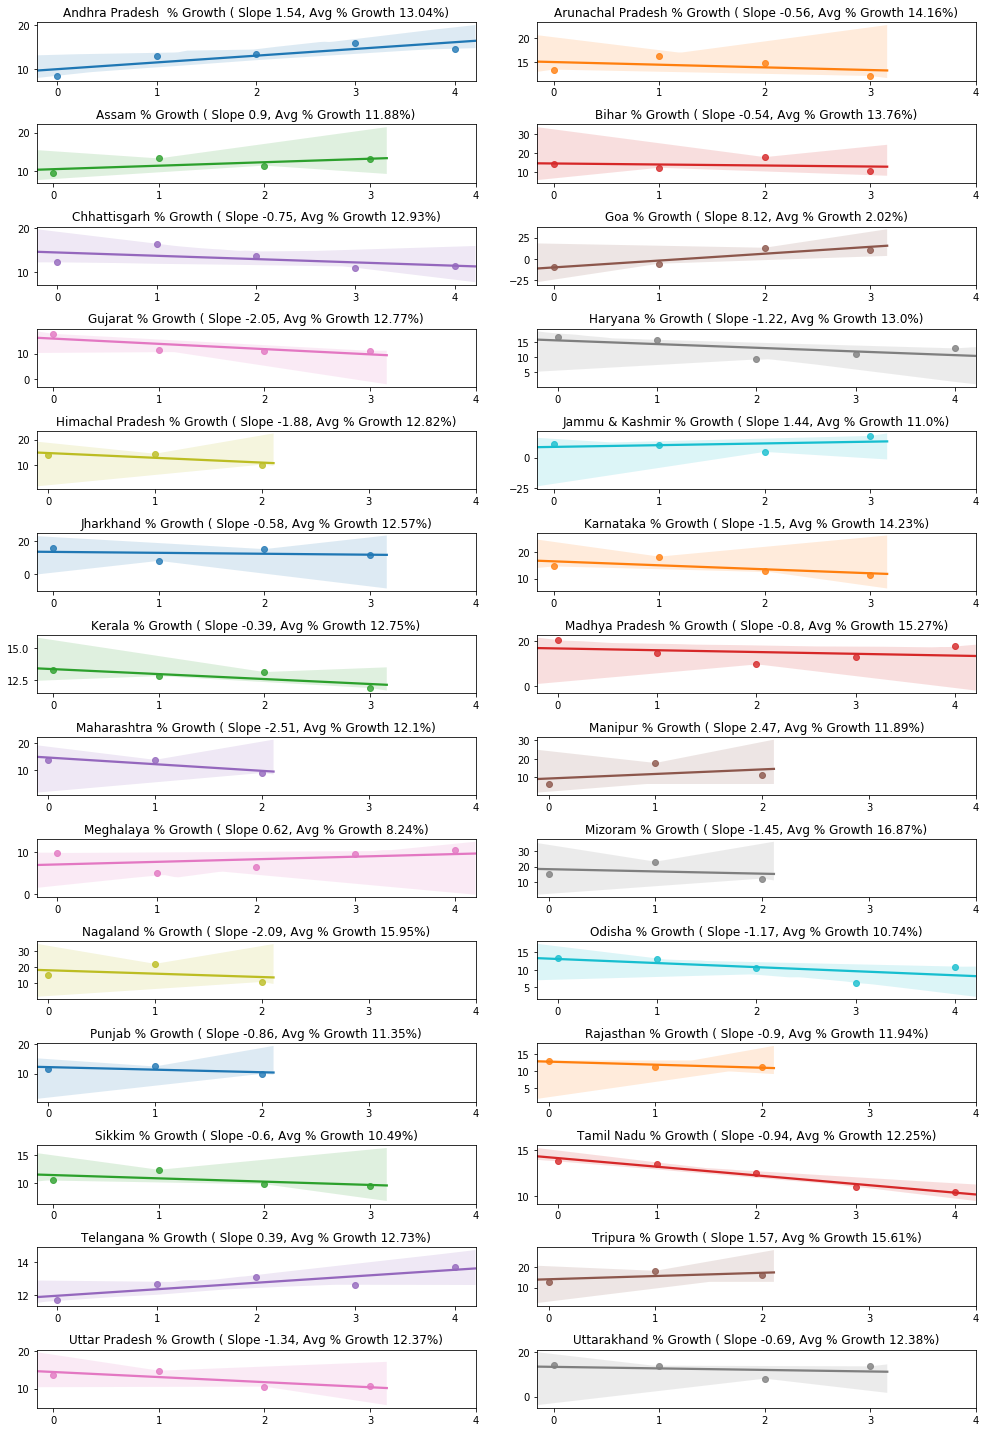

In [16]:
fig,axes = plt.subplots(14,2,figsize=(14,20))
for state,ax in zip(states,axes.ravel()):
    x=dfa[dfa["Items  Description"] == "(% Growth over previous year)"][state].dropna().values
    m,c=np.polyfit(np.arange(len(x)),x,1)
    sns.regplot(x=np.arange(len(x)),y=x,ax=ax)
    xticks=dfa[dfa["Items  Description"] == "(% Growth over previous year)"]["Duration"].values
    ax.set_xticks(np.arange(len(xticks)))
    ax.set_title(state+" % Growth"+" ( Slope " + str(round(m,2))+", Avg % Growth "+str(round(np.mean(x),2))+"%)")
plt.tight_layout()

#We Could Compare the Slope of Two States to see which state is having consistent growth more the slope more the growth

In [17]:
avg = []
slope = []
for state in states:    
    x=dfa[dfa["Items  Description"] == "(% Growth over previous year)"][state].dropna().values
    m,c=np.polyfit(np.arange(len(x)),x,1)
    slope.append(m)
    avg.append(np.mean(x))
df = pd.DataFrame({"States":states,"Slope":slope,"Avg % Growth":avg})
    

In [18]:
df.head()

,States,Slope,Avg % Growth
0,Andhra Pradesh,1.544,13.0360
1,Arunachal Pradesh,-0.561,14.1625
2,Assam,0.903,11.8775
3,Bihar,-0.536,13.7650
4,Chhattisgarh,-0.754,12.9340


In [19]:
#plt.figure(figsize=(15,3))
df.set_index("States",inplace=True)

Text(0.5, 1.0, 'Top3 Fastest Growing States')

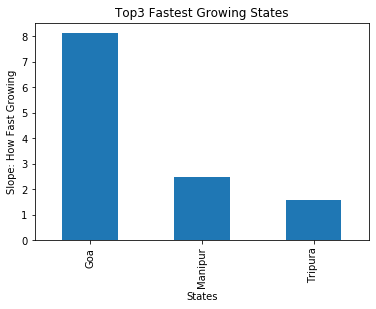

In [20]:
df["Slope"].sort_values(ascending=False)[:3].plot(kind="bar")
plt.ylabel("Slope: How Fast Growing")
plt.title("Top3 Fastest Growing States")

Text(0.5, 1.0, 'Bottom 3/ Struggling to further Grow States')

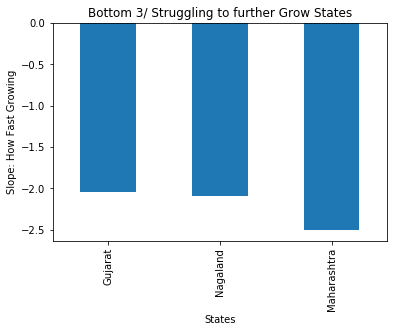

In [21]:
df["Slope"].sort_values(ascending=False)[-3:].plot(kind="bar")
plt.ylabel("Slope: How Fast Growing")
plt.title("Bottom 3/ Struggling to further Grow States")

Text(0.5, 1.0, 'Top3 States in terms of Avg Growth %')

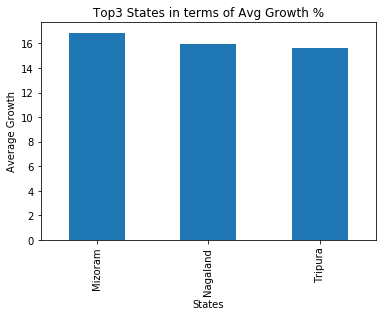

In [22]:
df["Avg % Growth"].sort_values(ascending=False)[:3].plot(kind="bar")
plt.ylabel("Average Growth")
plt.title("Top3 States in terms of Avg Growth %")

Text(0.5, 1.0, 'Bottom 3 in terms of Avg Growth %')

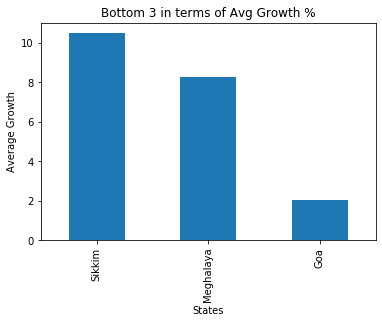

In [23]:
df["Avg % Growth"].sort_values(ascending=False)[-3:].plot(kind="bar")
plt.ylabel("Average Growth")
plt.title("Bottom 3 in terms of Avg Growth %")

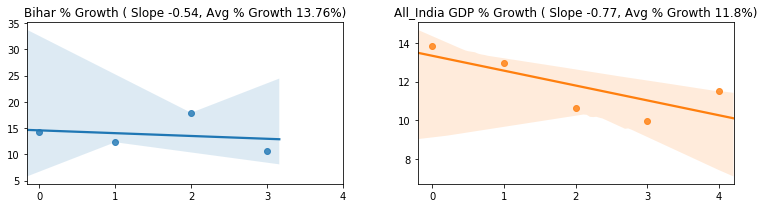

In [24]:
fig,axes = plt.subplots(1,2,figsize=(11,3))
HomeAllIndia = ['Bihar',"All_India GDP"]
for state,ax in zip(HomeAllIndia,axes.ravel()):
    x=dfa[dfa["Items  Description"] == "(% Growth over previous year)"][state].dropna().values
    m,c=np.polyfit(np.arange(len(x)),x,1)
    sns.regplot(x=np.arange(len(x)),y=x,ax=ax)
    xticks=dfa[dfa["Items  Description"] == "(% Growth over previous year)"]["Duration"].values
    ax.set_xticks(np.arange(len(xticks)))
    ax.set_title(state+" % Growth"+" ( Slope " + str(round(m,2))+", Avg % Growth "+str(round(np.mean(x),2))+"%)")
plt.tight_layout()

In [25]:
#dfa.info()

In [26]:
dfat = dfa[dfa["Duration"]=="2015-16"].T

In [27]:
dfat.iloc[0]

4    GSDP - CURRENT PRICES (` in Crore)
9         (% Growth over previous year)
Name: Items  Description, dtype: object

In [28]:
dfat = dfat.iloc[2:]

In [29]:
dfat.index.name ="Item"

In [30]:
dfat.rename(columns={4:"GSDP - CURRENT PRICES (` in Crore)",9:"(% Growth over previous year)"},inplace=True)

In [31]:
lis =['Andhra Pradesh ', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand']

Text(0, 0.5, 'GSDP')

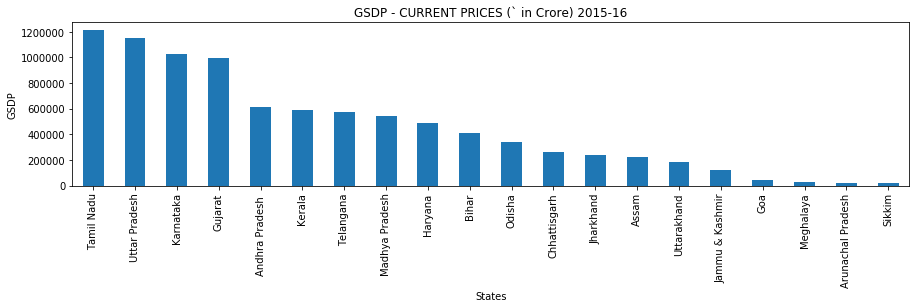

In [32]:
plt.figure(figsize=(15,3))
dfat[dfat.index.isin(lis)]["GSDP - CURRENT PRICES (` in Crore)"].dropna().sort_values(ascending=False).plot(kind="bar")
plt.title("GSDP - CURRENT PRICES (` in Crore) 2015-16")
plt.xlabel("States")
plt.ylabel("GSDP")

Text(0, 0.5, 'GSDP')

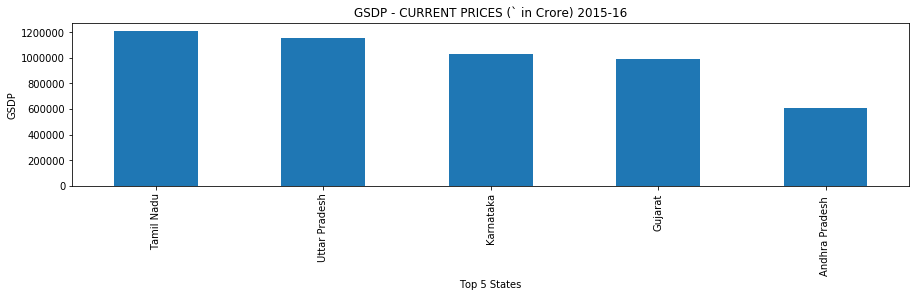

In [33]:
plt.figure(figsize=(15,3))
dfat[dfat.index.isin(lis)]["GSDP - CURRENT PRICES (` in Crore)"].dropna().sort_values(ascending=False)[:5].plot(kind="bar")
plt.title("GSDP - CURRENT PRICES (` in Crore) 2015-16")
plt.xlabel("Top 5 States")
plt.ylabel("GSDP")

Text(0, 0.5, 'GSDP')

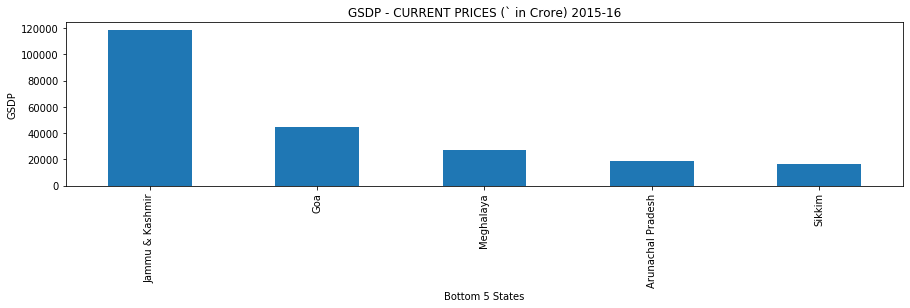

In [34]:
plt.figure(figsize=(15,3))
dfat[dfat.index.isin(lis)]["GSDP - CURRENT PRICES (` in Crore)"].dropna().sort_values(ascending=False)[-5:].plot(kind="bar")
plt.title("GSDP - CURRENT PRICES (` in Crore) 2015-16")
plt.xlabel("Bottom 5 States")
plt.ylabel("GSDP")

Conclusion I # States with Double digit Growth Rate and further growing

In [35]:
df[(df["Slope"] > 0)& (df["Avg % Growth"]>=10)]

,Slope,Avg % Growth
States,,
Andhra Pradesh,1.544,13.036000
Assam,0.903,11.877500
Jammu & Kashmir,1.441,11.002500
Manipur,2.470,11.890000
Telangana,0.392,12.732000
Tripura,1.570,15.613333


Conclusion II States with Double digit Growth Rate and struggling to keep it up since slope is -ve
Conclusion III:Goa is  doing poor with 2% growth rate but fast growing (slope 8)
    and next is Meghalaya with single digit growth 8.24 and struggling to reach in double digit since slope 0.6

In [36]:
df[~((df["Slope"] > 0)& (df["Avg % Growth"]>=10))]

,Slope,Avg % Growth
States,,
Arunachal Pradesh,-0.561,14.162500
Bihar,-0.536,13.765000
Chhattisgarh,-0.754,12.934000
Goa,8.120,2.020000
Gujarat,-2.045,12.767500
Haryana,-1.216,12.998000
Himachal Pradesh,-1.875,12.816667
Jharkhand,-0.577,12.567500
Karnataka,-1.496,14.230000


Overall Conclusion based on Conclusion I,II and Conclusion II -- Indian Economy is doing well with most of states able to
manage doubble digit growth rate and struggling as well to keep it up/ stay there except Goa and Meghalaya still to reach a double digit growth rate

# Part I-B : Data Source: Data I-B

In [37]:
dfb.head()

,S.No.,Item,2014-15,State
0,1,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh
1,1.1,Crops,7893514.0,Andhra_Pradesh
2,1.2,Livestock,4309078.0,Andhra_Pradesh
3,1.3,Forestry and logging,346160.0,Andhra_Pradesh
4,1.4,Fishing and aquaculture,2270664.0,Andhra_Pradesh


In [38]:
np.unique(dfb["State"])

array(['Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal_Pradesh', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil_Nadu', 'Telangana', 'Tripura', 'Uttar_Pradesh',
       'Uttarakhand'], dtype=object)

In [39]:
lisb=['Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana',
       'Himachal_Pradesh', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil_Nadu', 'Telangana', 'Tripura', 'Uttar_Pradesh',
       'Uttarakhand']

In [40]:
dfb = dfb[dfb["State"].isin(lisb)] #Filtering Out Union Teritorries

In [41]:
#np.unique(dfb["Item"])

In [42]:
dfbpc = dfb[dfb["Item"].isin(["Per Capita GSDP (Rs.)"])]

In [43]:
dfbpc.head()
dfbpc.set_index("State",inplace=True)

Text(0.5, 1.0, 'Per Capita in INR')

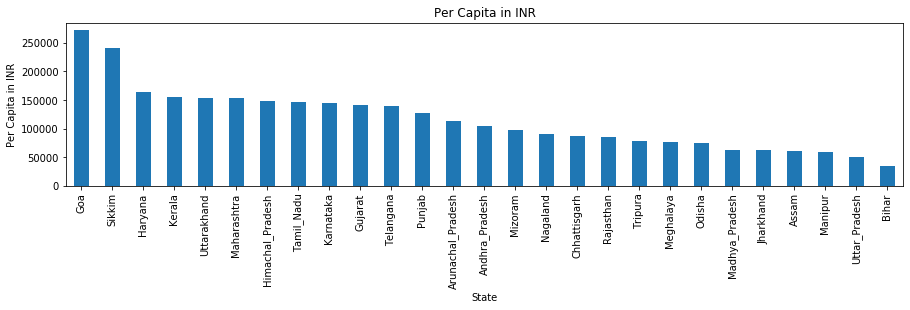

In [44]:
plt.figure(figsize=(15,3))
dfbpc["2014-15"].sort_values(ascending=False).plot(kind="bar")
plt.ylabel("Per Capita in INR")
plt.title("Per Capita in INR")

Text(0.5, 1.0, 'Per Capita in INR Bottom 5 States')

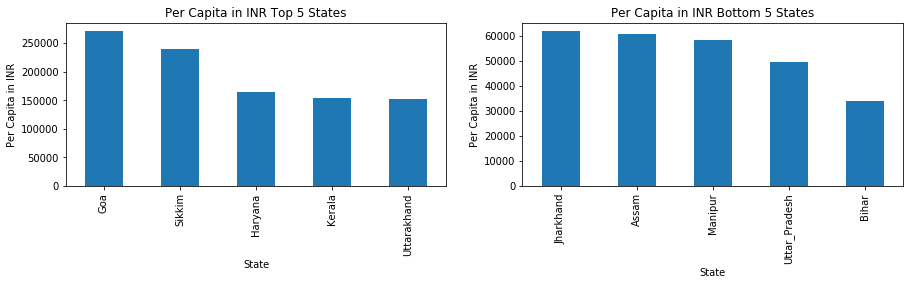

In [45]:
plt.subplots(1,2,figsize=(15,3))
plt.subplot(1,2,1)
dfbpc["2014-15"].sort_values(ascending=False)[:5].plot(kind="bar")
plt.ylabel("Per Capita in INR")
plt.title("Per Capita in INR Top 5 States")
plt.subplot(1,2,2)
dfbpc["2014-15"].sort_values(ascending=False)[-5:].plot(kind="bar")
plt.ylabel("Per Capita in INR")
plt.title("Per Capita in INR Bottom 5 States")

In [46]:
highest_lowest_per_capita =(dfbpc["2014-15"].sort_values(ascending=False)[:1].values /
                                      dfbpc["2014-15"].sort_values(ascending=False)[-1:].values)[0]

In [47]:
highest_lowest_per_capita

8.004741709371503

In [48]:
dfbs = dfb[dfb["Item"].isin(['Gross State Domestic Product','Primary','Secondary','Tertiary'])]

In [49]:
dfbs.set_index("State",inplace=True)

In [50]:
dfbs.head(8)

,S.No.,Item,2014-15
State,,,
Andhra_Pradesh,Total,Primary,16303716.0
Andhra_Pradesh,Total,Secondary,10488884.0
Andhra_Pradesh,Total,Tertiary,22032942.0
Andhra_Pradesh,15,Gross State Domestic Product,52646842.0
Arunachal_Pradesh,Total,Primary,716959.0
Arunachal_Pradesh,Total,Secondary,287489.0
Arunachal_Pradesh,Total,Tertiary,631844.0
Arunachal_Pradesh,15,Gross State Domestic Product,1676119.0


In [51]:
k=dfbs["2014-15"]/dfbs[dfbs["Item"]=="Gross State Domestic Product"]["2014-15"]

In [52]:
#k.values

In [53]:
#k.index

In [54]:
dfbs["Contiribution"] = k.values

C:\Users\c.a.singh\AN\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
dfbs.head(8)

,S.No.,Item,2014-15,Contiribution
State,,,,
Andhra_Pradesh,Total,Primary,16303716.0,0.309681
Andhra_Pradesh,Total,Secondary,10488884.0,0.199231
Andhra_Pradesh,Total,Tertiary,22032942.0,0.418505
Andhra_Pradesh,15,Gross State Domestic Product,52646842.0,1.000000
Arunachal_Pradesh,Total,Primary,716959.0,0.427749
Arunachal_Pradesh,Total,Secondary,287489.0,0.171521
Arunachal_Pradesh,Total,Tertiary,631844.0,0.376968
Arunachal_Pradesh,15,Gross State Domestic Product,1676119.0,1.000000


In [56]:
dfbpst = dfbs[dfbs["Item"].isin(["Primary","Secondary","Tertiary"])]

In [57]:
dfbpst.head(8)

,S.No.,Item,2014-15,Contiribution
State,,,,
Andhra_Pradesh,Total,Primary,16303716.0,0.309681
Andhra_Pradesh,Total,Secondary,10488884.0,0.199231
Andhra_Pradesh,Total,Tertiary,22032942.0,0.418505
Arunachal_Pradesh,Total,Primary,716959.0,0.427749
Arunachal_Pradesh,Total,Secondary,287489.0,0.171521
Arunachal_Pradesh,Total,Tertiary,631844.0,0.376968
Assam,Total,Primary,5326697.0,0.268892
Assam,Total,Secondary,4033091.0,0.203591


In [58]:
lst = ['Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya_Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil_Nadu',
       'Telangana', 'Tripura', 'Uttar_Pradesh', 'Uttarakhand']

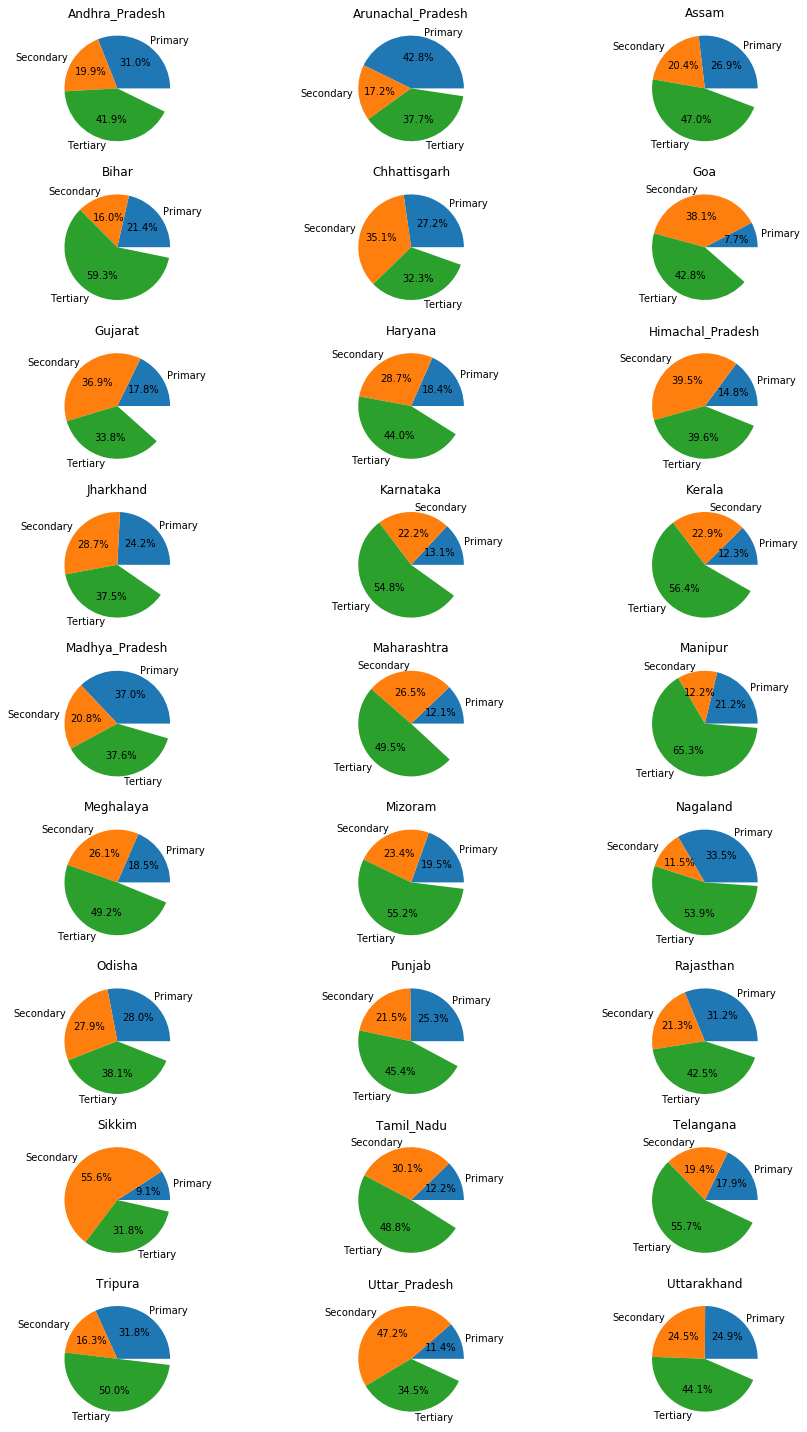

In [59]:
fig,ax = plt.subplots(9,3,figsize=(13,20)) #Used PIE chart to show the share of each sector
axes = ax.ravel()                          #All sector does not add up to 100% due to (tax-subsidy)is part of total GDP
for state,ax in zip(lst,axes):
    dt=dfbpst[dfbpst.index.isin([state])][["Item","Contiribution"]]
    ax.pie(dt["Contiribution"].values,labels=dt["Item"].values,autopct='%1.1f%%')
    ax.set_title(state)
plt.tight_layout()

In [60]:
dfbpst.head()

,S.No.,Item,2014-15,Contiribution
State,,,,
Andhra_Pradesh,Total,Primary,16303716.0,0.309681
Andhra_Pradesh,Total,Secondary,10488884.0,0.199231
Andhra_Pradesh,Total,Tertiary,22032942.0,0.418505
Arunachal_Pradesh,Total,Primary,716959.0,0.427749
Arunachal_Pradesh,Total,Secondary,287489.0,0.171521


In [61]:
dfint=dfb[dfb["Item"]=="Per Capita GSDP (Rs.)"]

In [62]:
dfint["Per Capita"] =  dfint["2014-15"]

C:\Users\c.a.singh\AN\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
dfint.drop("2014-15",axis=1,inplace=True)

C:\Users\c.a.singh\AN\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
dfint.head()

,S.No.,Item,State,Per Capita
32,17,Per Capita GSDP (Rs.),Andhra_Pradesh,104977.0
65,17,Per Capita GSDP (Rs.),Arunachal_Pradesh,112718.0
98,17,Per Capita GSDP (Rs.),Assam,60621.0
131,17,Per Capita GSDP (Rs.),Bihar,33954.0
197,17,Per Capita GSDP (Rs.),Chhattisgarh,86860.0


In [65]:
merged = pd.merge(dfbpst, dfint, left_index=True, right_on='State')

In [66]:
merged.drop(["Item_y","S.No._y","S.No._x"],axis=1,inplace=True)

In [67]:
merged[merged["State"]=="Haryana"]

,Item_x,2014-15,Contiribution,State,Per Capita
329,Primary,8040424.0,0.183797,Haryana,164077.0
329,Secondary,12561411.0,0.287143,Haryana,164077.0
329,Tertiary,19226568.0,0.439503,Haryana,164077.0


In [68]:
a=np.quantile(dfint["Per Capita"],.20)

In [69]:
b=np.quantile(dfint["Per Capita"],.5)

In [70]:
c=np.quantile(dfint["Per Capita"],.85)

In [71]:
cat = []
for value in merged["Per Capita"].values:
    if value <= a:
        cat.append("C4")
    elif value > a and value <= b:
        cat.append("C3")
    elif value >b and value <= c:
        cat.append("C2")
    elif value >c:
        cat.append("C1")

In [72]:
merged["Category"] = cat

In [73]:
merged.head(6)

,Item_x,2014-15,Contiribution,State,Per Capita,Category
32,Primary,16303716.0,0.309681,Andhra_Pradesh,104977.0,C3
32,Secondary,10488884.0,0.199231,Andhra_Pradesh,104977.0,C3
32,Tertiary,22032942.0,0.418505,Andhra_Pradesh,104977.0,C3
65,Primary,716959.0,0.427749,Arunachal_Pradesh,112718.0,C2
65,Secondary,287489.0,0.171521,Arunachal_Pradesh,112718.0,C2
65,Tertiary,631844.0,0.376968,Arunachal_Pradesh,112718.0,C2


In [74]:
dfint["Percentile_rank"] = dfint["Per Capita"].rank(pct=True)

C:\Users\c.a.singh\AN\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
dfint.head()

,S.No.,Item,State,Per Capita,Percentile_rank
32,17,Per Capita GSDP (Rs.),Andhra_Pradesh,104977.0,0.518519
65,17,Per Capita GSDP (Rs.),Arunachal_Pradesh,112718.0,0.555556
98,17,Per Capita GSDP (Rs.),Assam,60621.0,0.148148
131,17,Per Capita GSDP (Rs.),Bihar,33954.0,0.037037
197,17,Per Capita GSDP (Rs.),Chhattisgarh,86860.0,0.407407


In [76]:
merged1 = pd.merge(dfbpst, dfint, left_index=True, right_on='State')

In [77]:
merged1.drop(["Item_y","S.No._y","S.No._x"],axis=1,inplace=True)

In [78]:
merged1.head()

,Item_x,2014-15,Contiribution,State,Per Capita,Percentile_rank
32,Primary,16303716.0,0.309681,Andhra_Pradesh,104977.0,0.518519
32,Secondary,10488884.0,0.199231,Andhra_Pradesh,104977.0,0.518519
32,Tertiary,22032942.0,0.418505,Andhra_Pradesh,104977.0,0.518519
65,Primary,716959.0,0.427749,Arunachal_Pradesh,112718.0,0.555556
65,Secondary,287489.0,0.171521,Arunachal_Pradesh,112718.0,0.555556


In [79]:
merg1_sel= merged1[merged1["Item_x"]=="Primary"][['Item_x','State','Contiribution','Percentile_rank']]

In [80]:
merg1_sel.head()

,Item_x,State,Contiribution,Percentile_rank
32,Primary,Andhra_Pradesh,0.309681,0.518519
65,Primary,Arunachal_Pradesh,0.427749,0.555556
98,Primary,Assam,0.268892,0.148148
131,Primary,Bihar,0.214484,0.037037
197,Primary,Chhattisgarh,0.272396,0.407407


In [81]:
merg1_sel["Contiribution"].corr(merg1_sel["Percentile_rank"])

-0.46795405590420486

#There is negative correlation between Primary Sector contribution and Per capita GDP of states

Text(0, 0.5, 'Per Capita Percentile Rank')

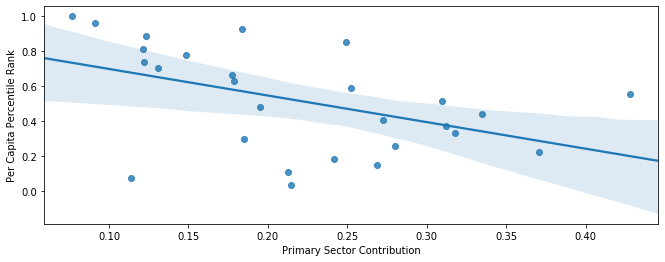

In [82]:
plt.figure(figsize=(11,4)) # Negative Correlation Primary Secotor Contibution and Percentile Rank of Per Capita Income
sns.regplot(merg1_sel["Contiribution"],merg1_sel["Percentile_rank"])
plt.xlabel("Primary Sector Contribution")
plt.ylabel("Per Capita Percentile Rank")

In [83]:
merged.head()

,Item_x,2014-15,Contiribution,State,Per Capita,Category
32,Primary,16303716.0,0.309681,Andhra_Pradesh,104977.0,C3
32,Secondary,10488884.0,0.199231,Andhra_Pradesh,104977.0,C3
32,Tertiary,22032942.0,0.418505,Andhra_Pradesh,104977.0,C3
65,Primary,716959.0,0.427749,Arunachal_Pradesh,112718.0,C2
65,Secondary,287489.0,0.171521,Arunachal_Pradesh,112718.0,C2


In [84]:
mi=merged[["State","Category"]]

In [85]:
mi.drop_duplicates(inplace=True)

C:\Users\c.a.singh\AN\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
mi.head()

,State,Category
32,Andhra_Pradesh,C3
65,Arunachal_Pradesh,C2
98,Assam,C4
131,Bihar,C4
197,Chhattisgarh,C3


In [87]:
mcat = pd.merge(dfb, mi, left_on="State", right_on="State")

In [88]:
mcat.head()

,S.No.,Item,2014-15,State,Category
0,1,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh,C3
1,1.1,Crops,7893514.0,Andhra_Pradesh,C3
2,1.2,Livestock,4309078.0,Andhra_Pradesh,C3
3,1.3,Forestry and logging,346160.0,Andhra_Pradesh,C3
4,1.4,Fishing and aquaculture,2270664.0,Andhra_Pradesh,C3


In [89]:
mcatnd = mcat[mcat["S.No."].isin(['1','2','3','4','5','6','7','8','9','10','11','15','17'])]

In [90]:
mcatnd.head()

,S.No.,Item,2014-15,State,Category
0,1,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh,C3
5,2,Mining and quarrying,1484300.0,Andhra_Pradesh,C3
7,3,Manufacturing,4672266.0,Andhra_Pradesh,C3
8,4,"Electricity, gas, water supply & other utility...",1151729.0,Andhra_Pradesh,C3
9,5,Construction,4664889.0,Andhra_Pradesh,C3


In [91]:
mj=mcatnd[mcatnd["Item"]=="Gross State Domestic Product"][["2014-15","State"]]

In [92]:
mj.head()

,2014-15,State
30,52646842.0,Andhra_Pradesh
63,1676119.0,Arunachal_Pradesh
96,19809800.0,Assam
129,37391988.0,Bihar
162,23498180.0,Chhattisgarh


In [93]:
mcatnd1 = pd.merge(mcatnd, mj, left_on="State", right_on="State")

In [94]:
mcatnd1.head()

,S.No.,Item,2014-15_x,State,Category,2014-15_y
0,1,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh,C3,52646842.0
1,2,Mining and quarrying,1484300.0,Andhra_Pradesh,C3,52646842.0
2,3,Manufacturing,4672266.0,Andhra_Pradesh,C3,52646842.0
3,4,"Electricity, gas, water supply & other utility...",1151729.0,Andhra_Pradesh,C3,52646842.0
4,5,Construction,4664889.0,Andhra_Pradesh,C3,52646842.0


In [95]:
mcatnd1["SubSec Per Contrib"] = mcatnd1["2014-15_x"] / mcatnd1["2014-15_y"]

In [96]:
mcatnd1.head()

,S.No.,Item,2014-15_x,State,Category,2014-15_y,SubSec Per Contrib
0,1,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh,C3,52646842.0,0.281487
1,2,Mining and quarrying,1484300.0,Andhra_Pradesh,C3,52646842.0,0.028194
2,3,Manufacturing,4672266.0,Andhra_Pradesh,C3,52646842.0,0.088747
3,4,"Electricity, gas, water supply & other utility...",1151729.0,Andhra_Pradesh,C3,52646842.0,0.021877
4,5,Construction,4664889.0,Andhra_Pradesh,C3,52646842.0,0.088607


In [97]:
mcatnd2=mcatnd1[~(mcatnd1["Item"].isin(["Gross State Domestic Product","Per Capita GSDP (Rs.)"]))].sort_values(
    by=['State','SubSec Per Contrib'],ascending=[True,False])

In [98]:
mcatnd2.head(4)

,S.No.,Item,2014-15_x,State,Category,2014-15_y,SubSec Per Contrib
0,1,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh,C3,52646842.0,0.281487
6,7,"Transport, storage, communication & services r...",5076984.0,Andhra_Pradesh,C3,52646842.0,0.096435
2,3,Manufacturing,4672266.0,Andhra_Pradesh,C3,52646842.0,0.088747
4,5,Construction,4664889.0,Andhra_Pradesh,C3,52646842.0,0.088607


In [99]:
mcatnd2["CumContrib"]=mcatnd2.groupby("State")["SubSec Per Contrib"].cumsum().values

In [100]:
mcatnd2.head(11)

,S.No.,Item,2014-15_x,State,Category,2014-15_y,SubSec Per Contrib,CumContrib
0,1,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh,C3,52646842.0,0.281487,0.281487
6,7,"Transport, storage, communication & services r...",5076984.0,Andhra_Pradesh,C3,52646842.0,0.096435,0.377922
2,3,Manufacturing,4672266.0,Andhra_Pradesh,C3,52646842.0,0.088747,0.466669
4,5,Construction,4664889.0,Andhra_Pradesh,C3,52646842.0,0.088607,0.555277
8,9,"Real estate, ownership of dwelling & professio...",4405409.0,Andhra_Pradesh,C3,52646842.0,0.083679,0.638955
5,6,"Trade, repair, hotels and restaurants",4233400.0,Andhra_Pradesh,C3,52646842.0,0.080411,0.719366
10,11,Other services,4215389.0,Andhra_Pradesh,C3,52646842.0,0.080069,0.799435
9,10,Public administration,2200897.0,Andhra_Pradesh,C3,52646842.0,0.041805,0.841240
7,8,Financial services,1900863.0,Andhra_Pradesh,C3,52646842.0,0.036106,0.877346
1,2,Mining and quarrying,1484300.0,Andhra_Pradesh,C3,52646842.0,0.028194,0.905540


In [101]:
mcatnd2[mcatnd2["State"]=="Andhra_Pradesh"]["CumContrib"].values.searchsorted(.8)

7

In [102]:
mcatnd2[:8]

,S.No.,Item,2014-15_x,State,Category,2014-15_y,SubSec Per Contrib,CumContrib
0,1,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh,C3,52646842.0,0.281487,0.281487
6,7,"Transport, storage, communication & services r...",5076984.0,Andhra_Pradesh,C3,52646842.0,0.096435,0.377922
2,3,Manufacturing,4672266.0,Andhra_Pradesh,C3,52646842.0,0.088747,0.466669
4,5,Construction,4664889.0,Andhra_Pradesh,C3,52646842.0,0.088607,0.555277
8,9,"Real estate, ownership of dwelling & professio...",4405409.0,Andhra_Pradesh,C3,52646842.0,0.083679,0.638955
5,6,"Trade, repair, hotels and restaurants",4233400.0,Andhra_Pradesh,C3,52646842.0,0.080411,0.719366
10,11,Other services,4215389.0,Andhra_Pradesh,C3,52646842.0,0.080069,0.799435
9,10,Public administration,2200897.0,Andhra_Pradesh,C3,52646842.0,0.041805,0.841240


In [103]:
pcs=[]
for grp in mcatnd2.groupby("State"):
    x=grp[1]["CumContrib"].values.searchsorted(.8)+1
    dtf=grp[1][:x]
    pcs.append(dtf)

In [104]:
dfinal = pd.concat(pcs,ignore_index=True)

In [105]:
dfinal.head(11)

,S.No.,Item,2014-15_x,State,Category,2014-15_y,SubSec Per Contrib,CumContrib
0,1,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh,C3,52646842.0,0.281487,0.281487
1,7,"Transport, storage, communication & services r...",5076984.0,Andhra_Pradesh,C3,52646842.0,0.096435,0.377922
2,3,Manufacturing,4672266.0,Andhra_Pradesh,C3,52646842.0,0.088747,0.466669
3,5,Construction,4664889.0,Andhra_Pradesh,C3,52646842.0,0.088607,0.555277
4,9,"Real estate, ownership of dwelling & professio...",4405409.0,Andhra_Pradesh,C3,52646842.0,0.083679,0.638955
5,6,"Trade, repair, hotels and restaurants",4233400.0,Andhra_Pradesh,C3,52646842.0,0.080411,0.719366
6,11,Other services,4215389.0,Andhra_Pradesh,C3,52646842.0,0.080069,0.799435
7,10,Public administration,2200897.0,Andhra_Pradesh,C3,52646842.0,0.041805,0.841240
8,1,"Agriculture, forestry and fishing",686117.0,Arunachal_Pradesh,C2,1676119.0,0.409349,0.409349
9,10,Public administration,243867.0,Arunachal_Pradesh,C2,1676119.0,0.145495,0.554844


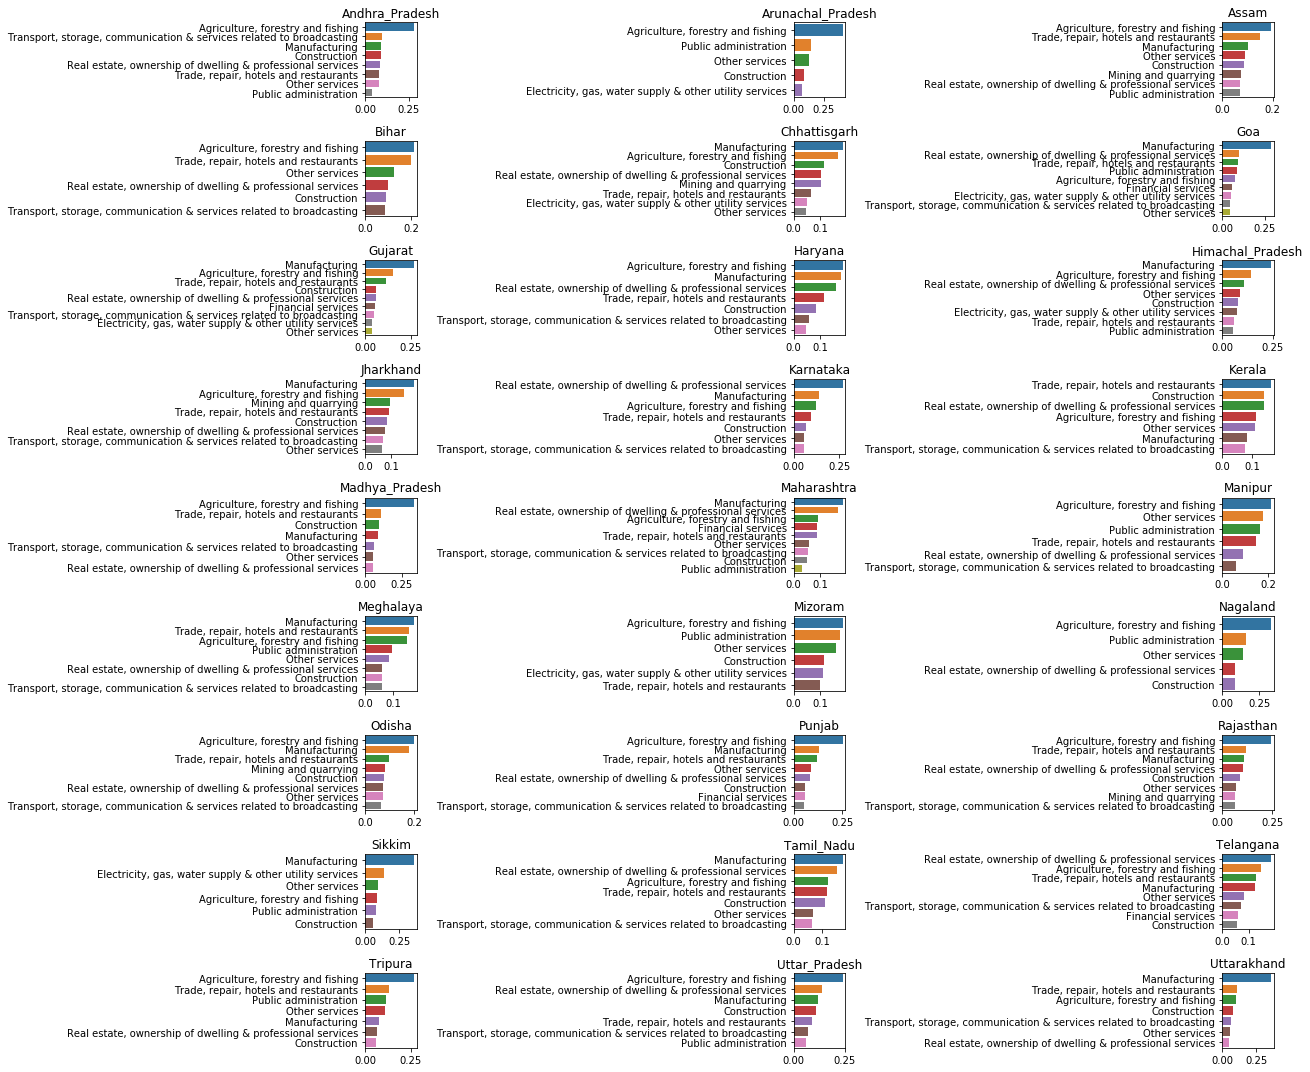

In [106]:
fig,ax = plt.subplots(9,3,figsize=(18,15)) #Used Bar to show Top 80 % contributing Sub Sectors for all States
st=np.unique(dfinal["State"])
axes = ax.ravel()                          
for state,ax in zip(st,axes):
    dt=dfinal[dfinal["State"]==state][["Item","SubSec Per Contrib"]]
    sns.barplot(x=dt["SubSec Per Contrib"].values,y=dt["Item"].values,ax=ax)
    ax.set_title(state)
plt.tight_layout()

In [107]:
mcatnd2.head()

,S.No.,Item,2014-15_x,State,Category,2014-15_y,SubSec Per Contrib,CumContrib
0,1,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh,C3,52646842.0,0.281487,0.281487
6,7,"Transport, storage, communication & services r...",5076984.0,Andhra_Pradesh,C3,52646842.0,0.096435,0.377922
2,3,Manufacturing,4672266.0,Andhra_Pradesh,C3,52646842.0,0.088747,0.466669
4,5,Construction,4664889.0,Andhra_Pradesh,C3,52646842.0,0.088607,0.555277
8,9,"Real estate, ownership of dwelling & professio...",4405409.0,Andhra_Pradesh,C3,52646842.0,0.083679,0.638955


In [108]:
cat= mcatnd2[["Item","Category","2014-15_x"]]

In [109]:
cat.head()

,Item,Category,2014-15_x
0,"Agriculture, forestry and fishing",C3,14819416.0
6,"Transport, storage, communication & services r...",C3,5076984.0
2,Manufacturing,C3,4672266.0
4,Construction,C3,4664889.0
8,"Real estate, ownership of dwelling & professio...",C3,4405409.0


In [110]:
pcs1=[]

for grp in cat.groupby(["Category","Item"]):
    dt11=grp[1][["Item","Category"]]
    sm=grp[1]["2014-15_x"].sum()
    dt12=dt11.drop_duplicates()
    dt12["total"]=sm
    pcs1.append(dt12)


C:\Users\c.a.singh\AN\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [111]:
cf=pd.concat(pcs1,ignore_index=True)

In [112]:
cf.head()

,Item,Category,total
0,"Agriculture, forestry and fishing",C1,14391809.0
1,Construction,C1,11264451.0
2,"Electricity, gas, water supply & other utility...",C1,2000998.0
3,Financial services,C1,3936489.0
4,Manufacturing,C1,13758793.0


In [113]:
cf["total"].sum()

1007802765.0

In [114]:
catsum11 = cf.groupby("Category").sum()

In [115]:
catsum11

,total
Category,
C1,93126679.0
C2,527484068.0
C3,167623412.0
C4,219568606.0


In [116]:
cf1 = pd.merge(cf,catsum11,left_on="Category",right_index=True,how="left")

In [117]:
cf1["SubSectorCon"] = cf1["total_x"]/cf1["total_y"]

In [118]:
cf1.head()

,Item,Category,total_x,total_y,SubSectorCon
0,"Agriculture, forestry and fishing",C1,14391809.0,93126679.0,0.154540
1,Construction,C1,11264451.0,93126679.0,0.120958
2,"Electricity, gas, water supply & other utility...",C1,2000998.0,93126679.0,0.021487
3,Financial services,C1,3936489.0,93126679.0,0.042270
4,Manufacturing,C1,13758793.0,93126679.0,0.147743


In [119]:
cf1["CumContribution"]=cf1.groupby("Category")["SubSectorCon"].cumsum().values

In [120]:
cf1.head()

,Item,Category,total_x,total_y,SubSectorCon,CumContribution
0,"Agriculture, forestry and fishing",C1,14391809.0,93126679.0,0.154540,0.154540
1,Construction,C1,11264451.0,93126679.0,0.120958,0.275498
2,"Electricity, gas, water supply & other utility...",C1,2000998.0,93126679.0,0.021487,0.296985
3,Financial services,C1,3936489.0,93126679.0,0.042270,0.339256
4,Manufacturing,C1,13758793.0,93126679.0,0.147743,0.486998


In [121]:
pms=[]
for grp in cf1.groupby("Category"):
    x=grp[1]["CumContribution"].values.searchsorted(.8)+1
    dtf=grp[1][:x]
    pms.append(dtf)

In [122]:
cf2 = pd.concat(pms,ignore_index=True)

In [123]:
cf2.head()

,Item,Category,total_x,total_y,SubSectorCon,CumContribution
0,"Agriculture, forestry and fishing",C1,14391809.0,93126679.0,0.154540,0.154540
1,Construction,C1,11264451.0,93126679.0,0.120958,0.275498
2,"Electricity, gas, water supply & other utility...",C1,2000998.0,93126679.0,0.021487,0.296985
3,Financial services,C1,3936489.0,93126679.0,0.042270,0.339256
4,Manufacturing,C1,13758793.0,93126679.0,0.147743,0.486998


Text(0.5, 1.0, 'Sub-Sec Contributing 80% of the GSDP of each category')

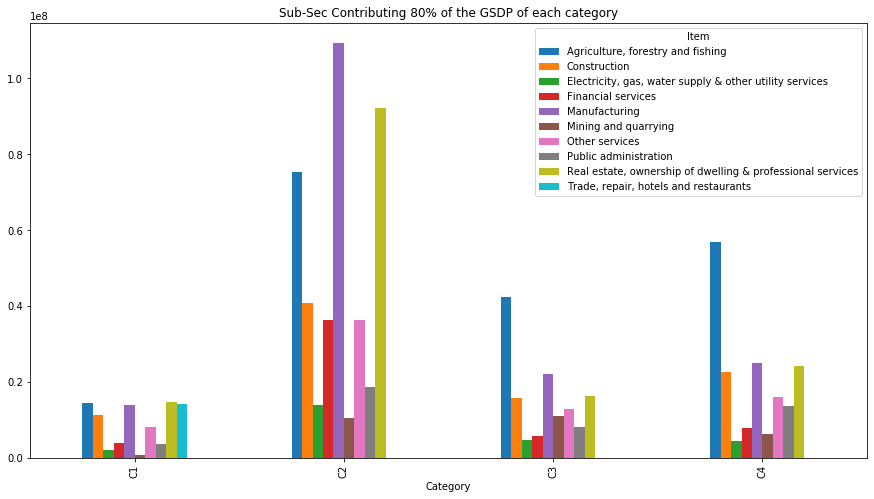

In [124]:
cf2.groupby(["Category","Item"])["total_x"].sum().unstack().plot(kind="bar",figsize=(15,8))
plt.title("Sub-Sec Contributing 80% of the GSDP of each category")

In [125]:
cf1.head()

,Item,Category,total_x,total_y,SubSectorCon,CumContribution
0,"Agriculture, forestry and fishing",C1,14391809.0,93126679.0,0.154540,0.154540
1,Construction,C1,11264451.0,93126679.0,0.120958,0.275498
2,"Electricity, gas, water supply & other utility...",C1,2000998.0,93126679.0,0.021487,0.296985
3,Financial services,C1,3936489.0,93126679.0,0.042270,0.339256
4,Manufacturing,C1,13758793.0,93126679.0,0.147743,0.486998


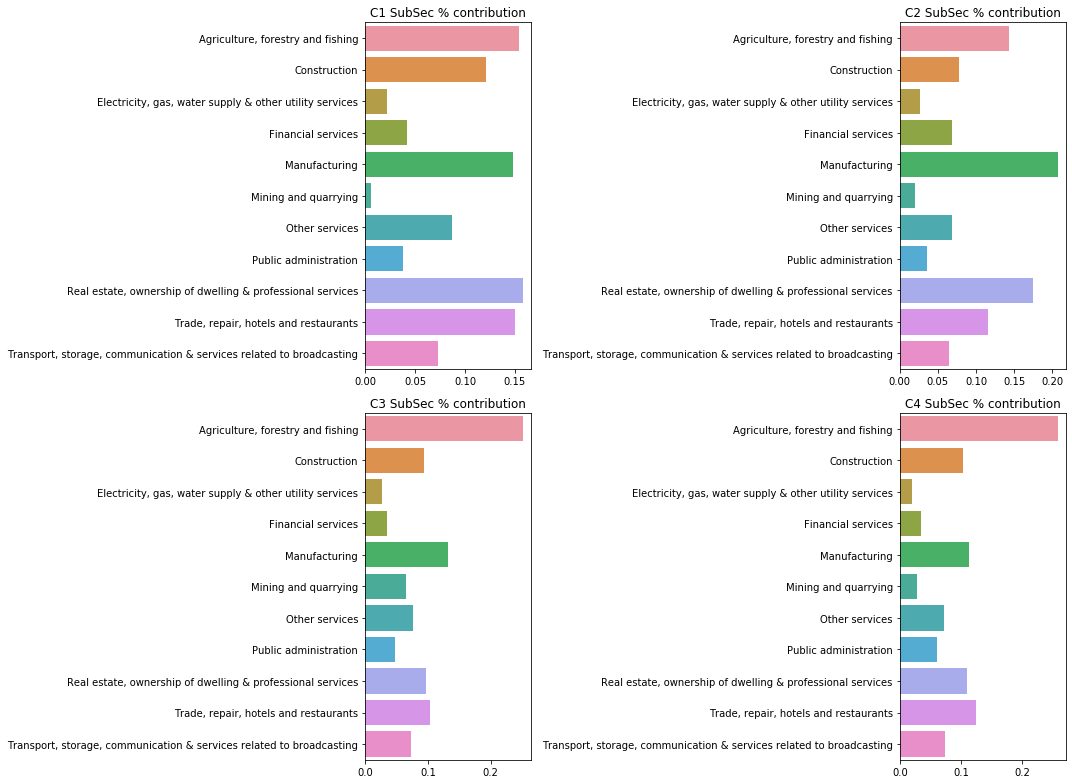

In [126]:
fig,ax = plt.subplots(2,2,figsize=(15,11))
sl=np.unique(cf1["Category"])
axes = ax.ravel()                          
for cat,ax in zip(sl,axes):
    dt=cf1[cf1["Category"]==cat][["Item","SubSectorCon"]]
    sns.barplot(x=dt["SubSectorCon"].values,y=dt["Item"].values,ax=ax)
    ax.set_title(cat+" SubSec % contribution")
plt.tight_layout()

How does the GDP distribution of the top states (C1) differ from the others?
Ans:Manufacturing,Real State and Trade,repair hotels and restaurants are contributing more in C1 category states
Which sub-sectors seem to be correlated with high GDP?
Ans:Manufacturing,Real State and Trade,repair hotels
Which sub-sectors do the various categories need to focus on?
Ans:C2 and C3 needs to focus more on their manufacturing output.

# Part II

In [127]:
dout = pd.read_csv("data/rs_session243_au570_1.1.csv")

In [128]:
dout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
Sl. No.                       37 non-null object
Level of Education - State    37 non-null object
Primary - 2014-2015           33 non-null float64
Upper Primary - 2014-2015     35 non-null float64
Secondary - 2014-2015         36 non-null float64
dtypes: float64(3), object(2)
memory usage: 1.6+ KB


In [129]:
dfint.head(2)

,S.No.,Item,State,Per Capita,Percentile_rank
32,17,Per Capita GSDP (Rs.),Andhra_Pradesh,104977.0,0.518519
65,17,Per Capita GSDP (Rs.),Arunachal_Pradesh,112718.0,0.555556


In [130]:
dout.head(2)

,Sl. No.,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,1,A & N Islands,1.21,1.69,9.87
1,2,Andhra Pradesh,4.35,5.20,15.71


In [131]:
#np.unique(dfint["State"])

In [132]:
for xx in ['Andhra_Pradesh', 'Arunachal_Pradesh', 'Himachal_Pradesh','Madhya_Pradesh','Tamil_Nadu','Uttar_Pradesh']:
           kk=" ".join(xx.split("_"))
           dout.loc[dout["Level of Education - State"]==kk,["Level of Education - State"]] = xx

In [133]:
dout.loc[dout["Level of Education - State"]=="Chhatisgarh",["Level of Education - State"]] = "Chhattisgarh"
dout.loc[dout["Level of Education - State"]=="Uttrakhand",["Level of Education - State"]] = "Uttarakhand"

In [134]:
p2df=pd.merge(dfint,dout,left_on="State",right_on="Level of Education - State",how="left")

In [135]:
p2df.head()

,S.No.,Item,State,Per Capita,Percentile_rank,Sl. No.,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,17,Per Capita GSDP (Rs.),Andhra_Pradesh,104977.0,0.518519,2,Andhra_Pradesh,4.35,5.20,15.71
1,17,Per Capita GSDP (Rs.),Arunachal_Pradesh,112718.0,0.555556,3,Arunachal_Pradesh,10.89,6.71,17.11
2,17,Per Capita GSDP (Rs.),Assam,60621.0,0.148148,4,Assam,7.44,10.51,27.06
3,17,Per Capita GSDP (Rs.),Bihar,33954.0,0.037037,5,Bihar,2.09,4.08,25.90
4,17,Per Capita GSDP (Rs.),Chhattisgarh,86860.0,0.407407,7,Chhattisgarh,1.42,5.85,21.26


In [136]:
p2dfs = p2df[["State","Per Capita","Primary - 2014-2015","Upper Primary - 2014-2015","Secondary - 2014-2015"]]

In [137]:
p2dfs.head()

,State,Per Capita,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,Andhra_Pradesh,104977.0,4.35,5.20,15.71
1,Arunachal_Pradesh,112718.0,10.89,6.71,17.11
2,Assam,60621.0,7.44,10.51,27.06
3,Bihar,33954.0,2.09,4.08,25.90
4,Chhattisgarh,86860.0,1.42,5.85,21.26


In [138]:
merged.head(2)

,Item_x,2014-15,Contiribution,State,Per Capita,Category
32,Primary,16303716.0,0.309681,Andhra_Pradesh,104977.0,C3
32,Secondary,10488884.0,0.199231,Andhra_Pradesh,104977.0,C3


In [139]:
p2df2=pd.merge(merged,dout,left_on="State",right_on="Level of Education - State",how="left")

In [140]:
p2df2s=p2df2[["State","Item_x","Contiribution","Primary - 2014-2015","Upper Primary - 2014-2015","Secondary - 2014-2015"]]

In [141]:
p2df2s.head(3)

,State,Item_x,Contiribution,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,Andhra_Pradesh,Primary,0.309681,4.35,5.2,15.71
1,Andhra_Pradesh,Secondary,0.199231,4.35,5.2,15.71
2,Andhra_Pradesh,Tertiary,0.418505,4.35,5.2,15.71


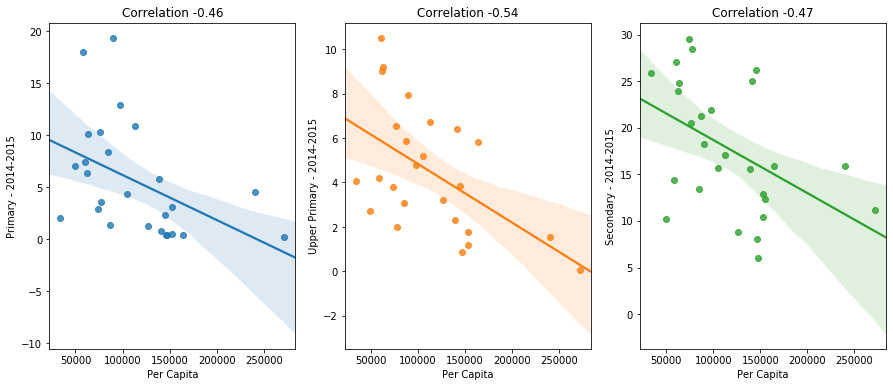

In [142]:
fig,ax=plt.subplots(1,3,figsize=(15,6))
axes = ax.ravel()
dpouts=["Primary - 2014-2015","Upper Primary - 2014-2015","Secondary - 2014-2015"]
for dts,ax in zip(dpouts,axes):
    sns.regplot(p2dfs["Per Capita"],p2dfs[dts],ax=ax)
    ax.set_xlabel("Per Capita")
    ax.set_ylabel(dts)
    ax.set_title("Correlation "+str(round(p2dfs["Per Capita"].corr(p2dfs[dts]),2)))

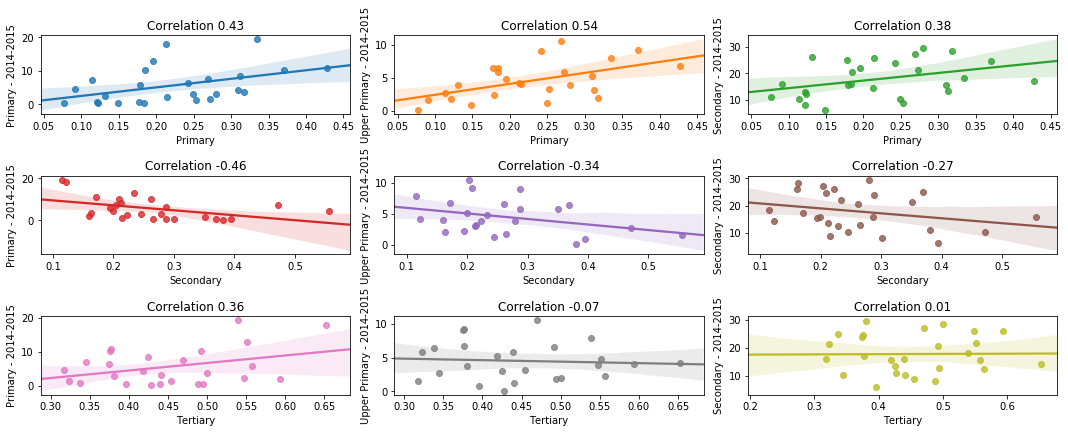

In [143]:
fig,ax=plt.subplots(3,3,figsize=(15,6))
axes = ax.ravel()
sectors=["Primary","Primary","Primary","Secondary","Secondary","Secondary","Tertiary","Tertiary","Tertiary"]
for sector,dts,ax in zip(sectors,dpouts*3,axes):
    sns.regplot(p2df2s[p2df2s['Item_x']==sector]["Contiribution"],p2df2s[p2df2s['Item_x']==sector][dts],ax=ax)
    ax.set_xlabel(sector)
    ax.set_ylabel(dts)
    ax.set_title("Correlation "+str(round(p2df2s[p2df2s['Item_x']==sector]["Contiribution"].corr(p2df2s[p2df2s['Item_x']==sector][dts]),2)))
plt.tight_layout()
    

In [144]:
dfat.head()

,GSDP - CURRENT PRICES (` in Crore),(% Growth over previous year)
Item,,
Andhra Pradesh,609934,15.85
Arunachal Pradesh,18784,12.07
Assam,224234,13.19
Bihar,413503,10.59
Chhattisgarh,260776,10.98
